# Feature Engineering

#### First take a look how train and test dataset look like after data cleaning

In [5]:
train_df.head(5)

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [6]:
test_df.head(5)

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Feature Extraction

### Drop features that do not appear in the test set

In [7]:
train_df.drop(columns=[col for col in train_df if 'PCIAT' in col], inplace=True)

### Check missing values per feature

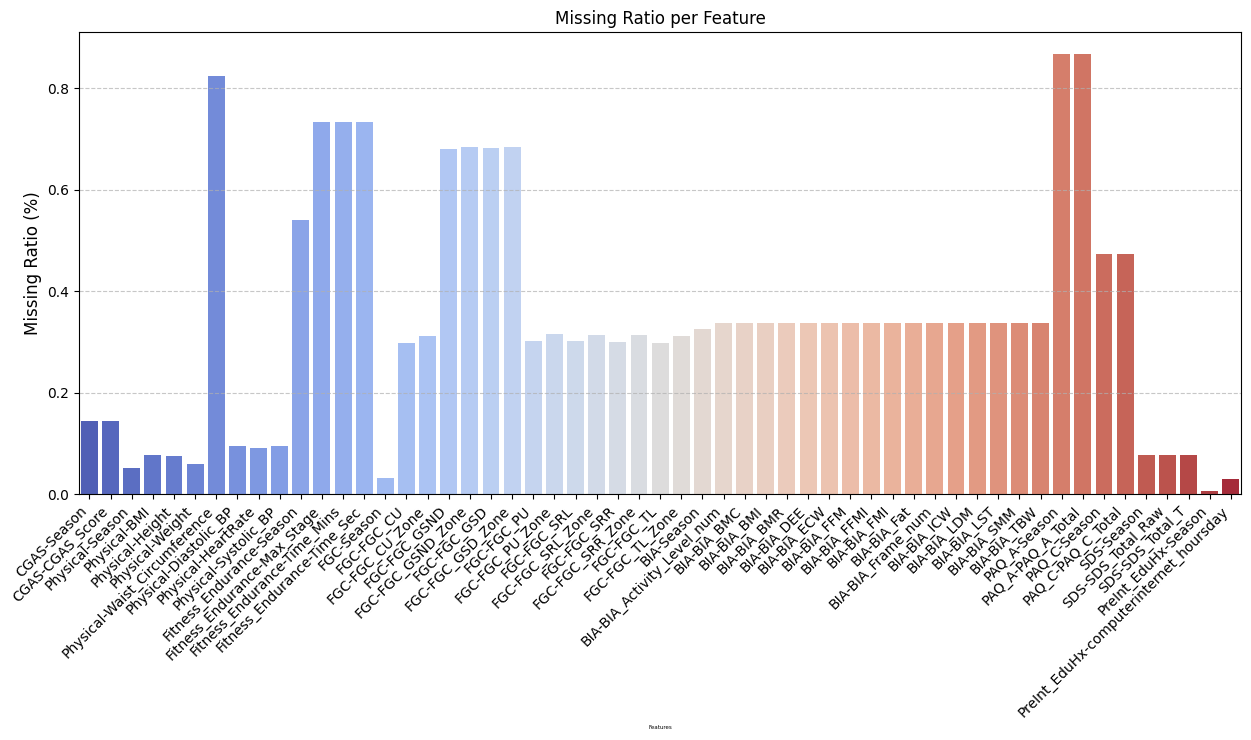

In [8]:
missing_ratio = train_df.isna().mean()

missing_ratio = missing_ratio[missing_ratio > 0]

missing_df = missing_ratio.reset_index()
missing_df.columns = ['Feature', 'Missing Ratio']

plt.figure(figsize=(15, 6))
sns.barplot(data=missing_df, x='Feature', y='Missing Ratio', palette='coolwarm')
plt.title('Missing Ratio per Feature', fontsize=12)
plt.ylabel('Missing Ratio (%)', fontsize=12)
plt.xlabel('Features', fontsize=4)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Remove features which miss more than a half

In [9]:
threshold = 0.5
missing_ratio = train_df.isnull().mean()
dropped_columns = missing_ratio[missing_ratio > threshold].index.tolist()

train_df.drop(columns=dropped_columns, inplace=True)
test_df.drop(columns=dropped_columns, inplace=True)

## 2. Feature Categorization

#### We split the features into 3 types: categorical, binary and numerical

After reviewing the data dictionary, we found that:
- Features have dtype=number but has meaning as categorical: `BIA-BIA_Activity_Level_num`,  `FGC-FGC_GSD_Zone`,`FGC-FGC_GSND_Zone`,`BIA-BIA_Frame_num`, `PreInt_EduHx-computerinternet_hoursday`
- The feature has dtype=object has 'Season' in its name

In [10]:
int_cols = ['BIA-BIA_Activity_Level_num', 'FGC-FGC_GSD_Zone','FGC-FGC_GSND_Zone','BIA-BIA_Frame_num', 'PreInt_EduHx-computerinternet_hoursday']
categorical_int_cols = [col for col in int_cols if col not in dropped_columns]

categorical_str_cols = [col for col in train_df.columns if 'Season' in col and col not in dropped_columns]

#Combine 2 types of categorical features
categorical_cols = categorical_str_cols + categorical_int_cols

In [11]:
binary_cols = [col for col in train_df.columns if train_df[col].nunique() == 2]

In [12]:
numerical_cols = [col for col in train_df.columns if col != 'sii' and col not in categorical_cols and col not in binary_cols]

## 3. Imputation

The strategy we will use is as follows:
- Fill missing values in categorical and binary features with the most frequently occurring value.
- Fill missing values in numerical features with the mean value.

In [13]:
for col in categorical_cols:
    mode_value = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_value)
    train_df[col] = train_df[col].astype(object)

for col in binary_cols:
    mode_value = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_value)
    train_df[col] = train_df[col].astype(int)

for col in numerical_cols:
    mean_value = train_df[col].mean()
    train_df[col] = train_df[col].fillna(mean_value)


In [14]:
for col in categorical_cols:
    mode_value = test_df[col].mode()[0]
    test_df[col] = test_df[col].fillna(mode_value)
    test_df[col] = test_df[col].astype(object)

for col in binary_cols:
    mode_value = test_df[col].mode()[0]
    test_df[col] = test_df[col].fillna(mode_value)
    test_df[col] = test_df[col].astype(int)

for col in numerical_cols:
    mean_value = test_df[col].mean()
    test_df[col] = test_df[col].fillna(mean_value)


## 4. Feature Scaling

#### We use standard scaler to scale the numerical features

In [15]:
scaler = StandardScaler()

# Helper function
def standardize(df):
    columns_to_standardize = [col for col in numerical_cols]
    df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
    return df

#Proceed with standardizing
train_df = standardize(train_df)
test_df = standardize(test_df)

## 5. Feature Encoding

#### We use one-hot encoding to encode the numerical features

In [16]:
#Helper function
def OneHot_Encoding(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dtype=int)
    original_dataframe = pd.concat([original_dataframe, dummies], axis=1)
    original_dataframe = original_dataframe.drop([feature_to_encode], axis=1)
    return original_dataframe

for col in categorical_cols:
    train_df = OneHot_Encoding(train_df, col)
    test_df = OneHot_Encoding(test_df, col)

In [17]:
# Remove feature which does not appear in test data after encoding, excluding 'sii'
train_miss = (set(train_df.columns) - set(test_df.columns)) - {'sii'}

train_df = train_df.drop(columns=train_miss)

#### Now, let’s review the data after applying these feature processing steps.

In [18]:
train_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PreInt_EduHx-Season_Winter,BIA-BIA_Activity_Level_num_2.0,BIA-BIA_Activity_Level_num_3.0,BIA-BIA_Activity_Level_num_5.0,BIA-BIA_Frame_num_1.0,BIA-BIA_Frame_num_2.0,PreInt_EduHx-computerinternet_hoursday_0.0,PreInt_EduHx-computerinternet_hoursday_1.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,-1.528487,0,-1.296014,-0.476635,-1.392050,-0.881360,0.000000,-1.082896e-15,-8.672395e-16,-1.187686,...,0,1,0,0,1,0,0,0,0,1
000fd460,-0.361407,0,0.000000,-1.079060,-1.110744,-0.995576,0.399730,-9.009683e-01,2.973259e-01,-0.888595,...,0,1,0,0,1,0,1,0,0,0
00105258,-0.069637,1,0.534609,-0.525100,0.084807,-0.291242,-0.362392,9.278811e-01,-7.806868e-03,0.806251,...,0,0,1,0,0,1,0,0,1,0
00115b9f,-0.361407,0,0.534609,-0.176658,0.014480,-0.148472,-0.743453,1.156487e+00,-7.806868e-03,0.606857,...,1,0,1,0,0,1,1,0,0,0
001f3379,0.805674,1,-1.387545,0.668686,0.506766,0.579658,-0.743453,-6.723621e-01,-9.232052e-01,0.008676,...,0,1,0,0,0,1,1,0,0,0


In [19]:
test_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PreInt_EduHx-Season_Winter,BIA-BIA_Activity_Level_num_2.0,BIA-BIA_Activity_Level_num_3.0,BIA-BIA_Activity_Level_num_5.0,BIA-BIA_Frame_num_1.0,BIA-BIA_Frame_num_2.0,PreInt_EduHx-computerinternet_hoursday_0.0,PreInt_EduHx-computerinternet_hoursday_1.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,-1.583385,0,-1.723923,-0.775133,-1.294562e+00,-1.551454e+00,0.000000,0.000000,0.000000,-1.420614,...,0,1,0,0,1,0,0,0,0,1
000fd460,-0.481900,0,0.000000,-1.519641,-9.226433e-01,-1.813672e+00,0.334979,-1.688635,0.296288,-0.930314,...,0,1,0,0,1,0,1,0,0,0
00105258,-0.206529,1,1.274204,-0.835030,6.580092e-01,-1.966632e-01,-0.417015,1.785129,-0.036280,1.848055,...,0,1,0,0,0,1,0,0,1,0
00115b9f,-0.481900,0,1.274204,-0.404408,5.650296e-01,1.311088e-01,-0.793012,2.219349,-0.036280,1.521188,...,1,0,1,0,0,1,1,0,0,0
0016bb22,1.996442,1,0.000000,0.000000,-1.321319e-15,7.763200e-16,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,1,0,0,1,0
